In [1]:
import math
import warnings

warnings.filterwarnings("ignore")

import sklearn.datasets
import pandas as pd
import numpy as np
import seaborn as sn
import matplotlib.pyplot as plt

###   t-SNE, UMAP and LargeVis

In this and the next notebook we will use manifold learning for data visualization of large data sets (with high dimensionality). In addition to t-SNE, two relatively new methods will be used that are more efficient on large data sets.


- UMAP (Uniform Manifold Approximation and Projection) - Install this Python package: https://umap-learn.readthedocs.io/en/latest/index.html. UMAP package is compatible with scikit-learn, making use of the same API and able to be added to sklearn pipelines. UMAP can work as a drop in replacement for t-SNE and other dimension reduction classes from scikit-learn


- LargeVis (Visualizing Large-scale and High-dimensional Data) - Many techniques (like t-SNE, UMAP and LargeVis) first compute a similarity structure of the data points and then project them into a low-dimensional space with the structure preserved. These two steps suffer from considerable computational costs Comparing to tSNE, LargeVis significantly reduces the computational cost of the graph construction step and employs a principled probabilistic model for the visualization step, the objective of which can be effectively optimized through asynchronous stochastic gradient descent with a linear time complexity. Download this algorithm repository and follow the installation instructions. https://github.com/lferry007/LargeVis


In [2]:
from sklearn.manifold import TSNE
import umap.umap_ as umap

To get data we use the sklearn.datasets.fetch_openml method, which as the name requires, Fetch dataset from openml by name or dataset id. We will use MNIST and Fashion-MNIST(Zalando's article images). Fashion-MNIST is intended to serve as a direct drop-in replacement for the original MNIST dataset for benchmarking machine learning algorithms. Instead of numbers it contains thumbnails of clothes images.

In [3]:
mnist = sklearn.datasets.fetch_openml('mnist_784', version=1, as_frame=False)
fmnist = sklearn.datasets.fetch_openml('Fashion-MNIST', version=1, as_frame=False)

Below are drawings of some samples from mnist and fmnist data sets

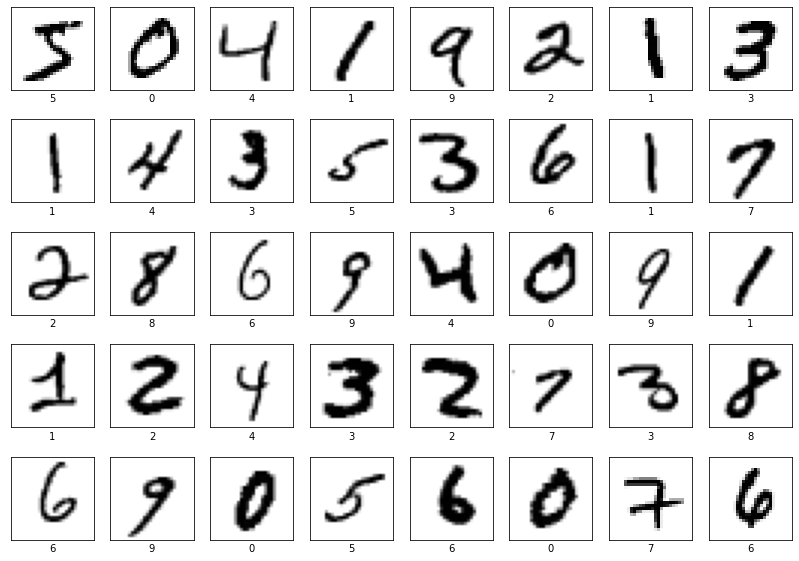

In [4]:
mnist_names = [i for i in range(10)]

plt.figure(figsize=(14, 10))
for i in range(40):
    plt.subplot(5, 8, i + 1)
    plt.xticks([])
    plt.yticks([])
    plt.grid(False)
    plt.imshow(mnist.data[i].reshape((28, 28)), cmap=plt.cm.binary)
    plt.xlabel(mnist_names[int(mnist.target[i])])
plt.show()

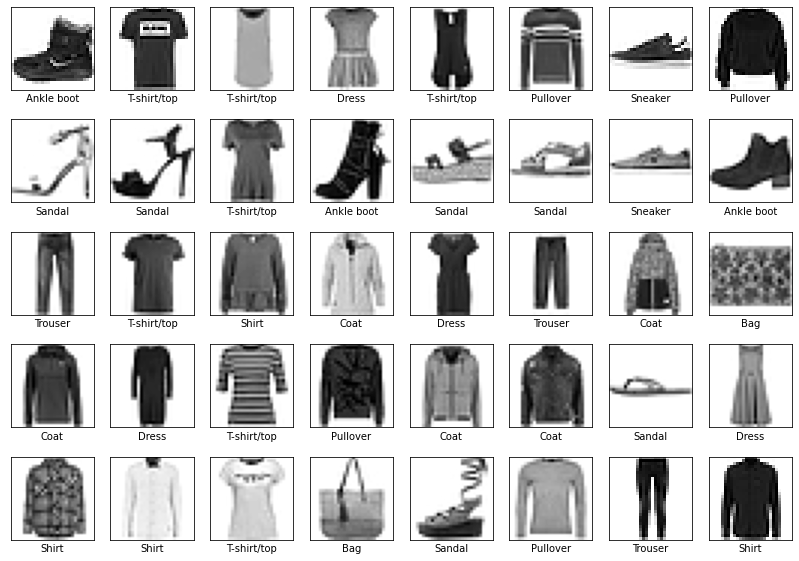

In [5]:
fmnist_names = ['T-shirt/top', 'Trouser', 'Pullover', 'Dress', 'Coat',
                'Sandal', 'Shirt', 'Sneaker', 'Bag', 'Ankle boot']

plt.figure(figsize=(14, 10))
for i in range(40):
    plt.subplot(5, 8, i + 1)
    plt.xticks([])
    plt.yticks([])
    plt.grid(False)
    plt.imshow(fmnist.data[i].reshape((28, 28)), cmap=plt.cm.binary)
    plt.xlabel(fmnist_names[int(fmnist.target[i])])
plt.show()

#### Use t-SNE, UMAP and LargeVis to project mnist and fmnist data sets into a 2-dimensional space. For LargeVis, you need to create a function that saves the data to the required by LargeVis txt file format, and a function that loads the resulting file. Draw charts for all visualizations.

In [21]:
def dataset_to_df(dataset, amount=10000):
    X = dataset.data / 255.0
    y = dataset.target
    print(X.shape, y.shape)
    feat_cols = ['pixel' + str(i) for i in range(0, X.shape[1])]
    df = pd.DataFrame(X[0:amount], columns=feat_cols)
    df['y'] = y[0:amount]
    # df['label'] = df['y'].apply(lambda i: str(i))
    return df


def visualize_embedding(df, embedding):
    df['2d-one'] = embedding[:, 0]
    df['2d-two'] = embedding[:, 1]
    plt.figure(figsize=(16, 10))
    sn.scatterplot(
        x="2d-one", y="2d-two",
        hue="y",
        palette=sn.color_palette("hls", 10),
        data=df,
        legend="full",
        alpha=0.3)

TSNE implementation

In [14]:
def execute_tsne(df):
    tsne = TSNE(n_components=2, verbose=1, perplexity=40, n_iter=300)
    tsne_results = tsne.fit_transform(df)
    return tsne_results

UMAP implementation

In [15]:
def execute_umap(df):
    reducer = umap.UMAP(random_state=42)
    umap_result = reducer.fit_transform(df)
    return umap_result

LargeVis Implementation

In [16]:
def execute_large_vis(df):
    pass

# Apply Algorithms on MNIST dataset

In [17]:
mnist_df = dataset_to_df(mnist)
mnist_df.head(5)

(70000, 784) (70000,)


,pixel0,pixel1,pixel2,pixel3,pixel4,pixel5,pixel6,pixel7,pixel8,pixel9,...,pixel775,pixel776,pixel777,pixel778,pixel779,pixel780,pixel781,pixel782,pixel783,y
0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,5
1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0
2,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,4
3,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1
4,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,9


[t-SNE] Computing 121 nearest neighbors...
[t-SNE] Indexed 10000 samples in 0.007s...
[t-SNE] Computed neighbors for 10000 samples in 2.231s...
[t-SNE] Computed conditional probabilities for sample 1000 / 10000
[t-SNE] Computed conditional probabilities for sample 2000 / 10000
[t-SNE] Computed conditional probabilities for sample 3000 / 10000
[t-SNE] Computed conditional probabilities for sample 4000 / 10000
[t-SNE] Computed conditional probabilities for sample 5000 / 10000
[t-SNE] Computed conditional probabilities for sample 6000 / 10000
[t-SNE] Computed conditional probabilities for sample 7000 / 10000
[t-SNE] Computed conditional probabilities for sample 8000 / 10000
[t-SNE] Computed conditional probabilities for sample 9000 / 10000
[t-SNE] Computed conditional probabilities for sample 10000 / 10000
[t-SNE] Mean sigma: 2.315644
[t-SNE] KL divergence after 250 iterations with early exaggeration: 68.582642
[t-SNE] KL divergence after 300 iterations: 2.322165


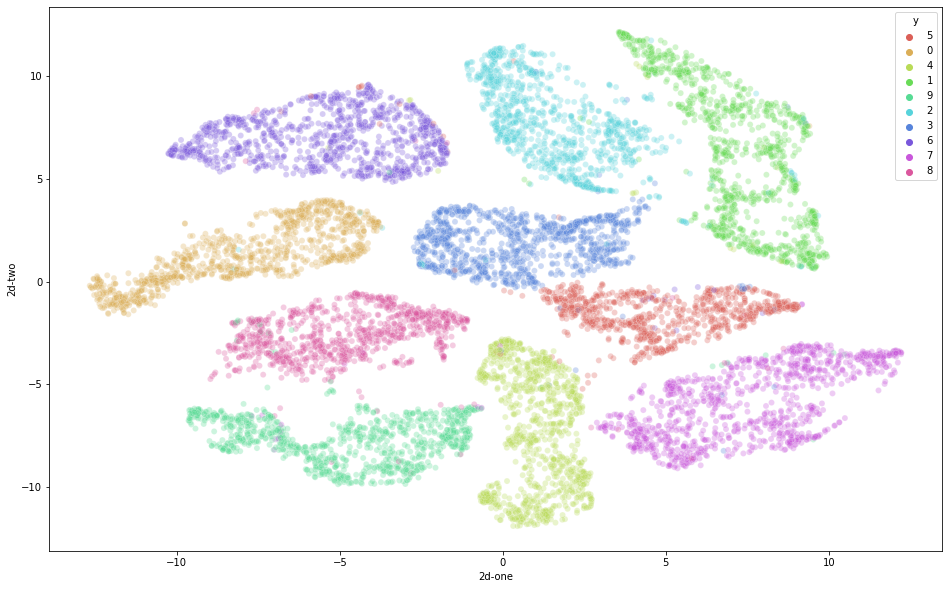

In [22]:
tsne_result_mnist = execute_tsne(mnist_df)
visualize_embedding(mnist_df, tsne_result_mnist)

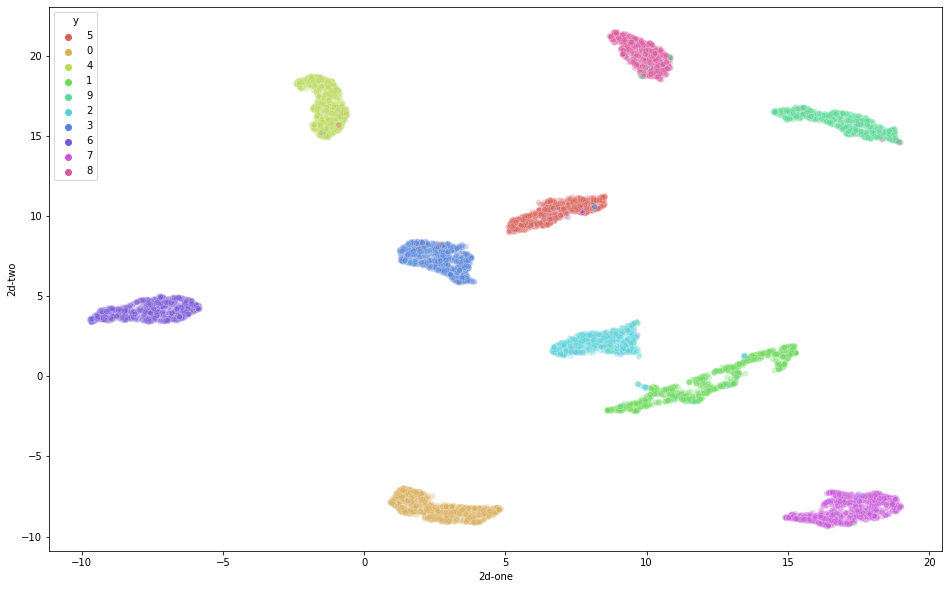

In [23]:
umap_result_mnist = execute_umap(mnist_df)
visualize_embedding(mnist_df, umap_result_mnist)

In [29]:
mnist_result = {
    'TSNE': tsne_result_mnist,
    'UMAP': umap_result_mnist
}

# Apply Algorithms on Fashion MNIST dataset

In [27]:
fashion_mnist_df = dataset_to_df(fmnist)
fashion_mnist_df.head(5)

(70000, 784) (70000,)


,pixel0,pixel1,pixel2,pixel3,pixel4,pixel5,pixel6,pixel7,pixel8,pixel9,...,pixel775,pixel776,pixel777,pixel778,pixel779,pixel780,pixel781,pixel782,pixel783,y
0,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,9
1,0.0,0.0,0.0,0.0,0.0,0.003922,0.0,0.0,0.000000,0.000000,...,0.447059,0.509804,0.298039,0.0,0.0,0.0,0.0,0.0,0.0,0
2,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.000000,0.086275,...,0.000000,0.003922,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0
3,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.129412,0.376471,...,0.000000,0.000000,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,3
4,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0


[t-SNE] Computing 121 nearest neighbors...
[t-SNE] Indexed 10000 samples in 0.008s...
[t-SNE] Computed neighbors for 10000 samples in 2.301s...
[t-SNE] Computed conditional probabilities for sample 1000 / 10000
[t-SNE] Computed conditional probabilities for sample 2000 / 10000
[t-SNE] Computed conditional probabilities for sample 3000 / 10000
[t-SNE] Computed conditional probabilities for sample 4000 / 10000
[t-SNE] Computed conditional probabilities for sample 5000 / 10000
[t-SNE] Computed conditional probabilities for sample 6000 / 10000
[t-SNE] Computed conditional probabilities for sample 7000 / 10000
[t-SNE] Computed conditional probabilities for sample 8000 / 10000
[t-SNE] Computed conditional probabilities for sample 9000 / 10000
[t-SNE] Computed conditional probabilities for sample 10000 / 10000
[t-SNE] Mean sigma: 1.866560
[t-SNE] KL divergence after 250 iterations with early exaggeration: 75.350372
[t-SNE] KL divergence after 300 iterations: 2.472546


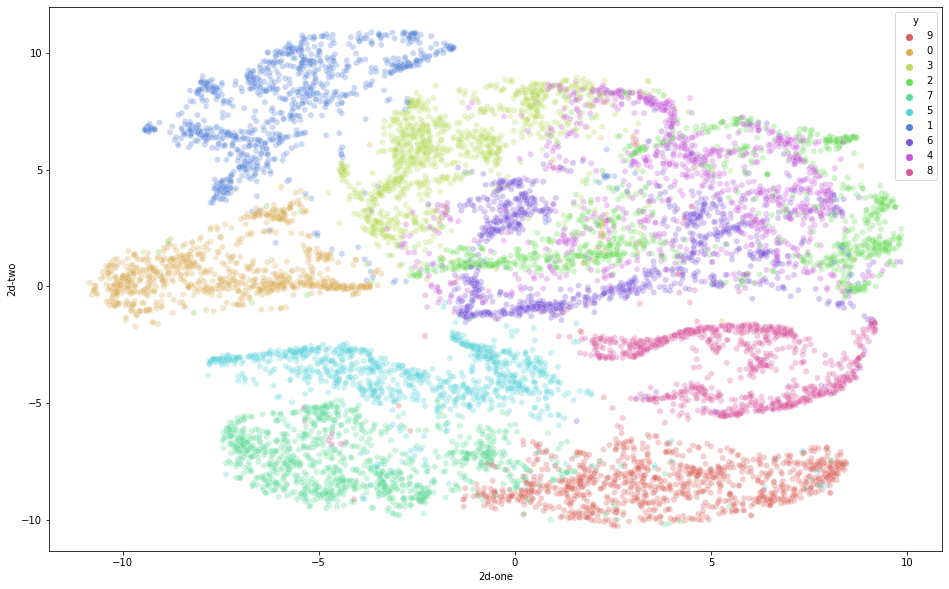

In [28]:
tsne_result_fmnist = execute_tsne(fashion_mnist_df)
visualize_embedding(fashion_mnist_df, tsne_result_fmnist)

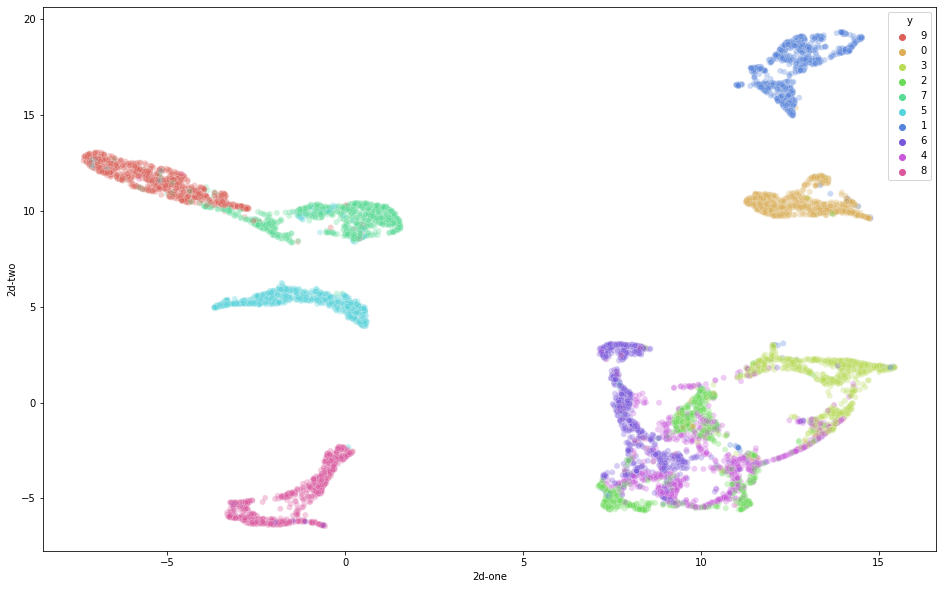

In [31]:
umap_result_fmnist = execute_umap(fashion_mnist_df)
visualize_embedding(fashion_mnist_df, umap_result_fmnist)

In [71]:
fashion_mnist_result = {
    'TSNE': tsne_result_fmnist,
    'UMAP': umap_result_fmnist
}

# Use Euclidian Metric

In [49]:
import math
import random
from statistics import mean

In [65]:
def euclidian_distance(point1, point2):
    x1, y1 = point1[0], point2[1]
    x2, y2 = point2[0], point2[1]
    distance = math.sqrt((x1 - x2) ** 2 + (y1 - y2) ** 2)
    return distance

In [66]:
def calculate_avg_distance(method_result, df, selected_label=None, samples=500):
    distances = []
    samples = random.sample(list(zip(method_result, df['y'])), samples)

    for point1, label1 in samples:
        for point2, label2 in samples:
            if selected_label is None and label1 != label2:
                distance = euclidian_distance(point1, point2)
                distances.append(distance)
            if label1 == label2 == selected_label:
                distance = euclidian_distance(point1, point2)
                distances.append(distance)

    return mean(distances)

In [67]:
def compute_euclidian_metric(method_result, df, labels=10):
    avg_distance_between_all_labels = calculate_avg_distance(method_result, df)
    distance_specific_label = []

    for i in range(0, labels):
        distance = calculate_avg_distance(method_result, df, str(i))
        distance_specific_label.append(distance)

    avg_distance_for_specific_labels = mean(distance_specific_label)
    return avg_distance_for_specific_labels / avg_distance_between_all_labels

In [69]:
# Calculate euclidian metric on MNIST Dataset
for key, value in mnist_result.items():
    metric_value = compute_euclidian_metric(value, mnist_df)
    print(f'Method: {key}, euclidian metric value: {metric_value}')

Method: TSNE, euclidian metric value: 0.33773222809216485
Method: UMAP, euclidian metric value: 0.157806012478907


In [73]:
# Calculate euclidian metric on Fashion MNIST Dataset
for key, value in fashion_mnist_result.items():
    metric_value = compute_euclidian_metric(value, fashion_mnist_df)
    print(f'Method: {key}, euclidian metric value: {metric_value}')

Method: TSNE, euclidian metric value: 0.4409673385614452
Method: UMAP, euclidian metric value: 0.1755064553577846
